In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#loading dataset 
data = pd.read_csv("dataset/Housing.csv")

In [3]:
#print 5 values from the dataset
data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
#checking null value in the dataset 
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
#checking duplicate value in the dataset
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
540    False
541    False
542    False
543    False
544    False
Length: 545, dtype: bool

In [6]:
#print all unique value in each column of the dataset
for single_column in data.columns:
    print("unique value in {} are: {}".format(single_column,data[single_column].unique()))

unique value in price are: [13300000 12250000 12215000 11410000 10850000 10150000  9870000  9800000
  9681000  9310000  9240000  9100000  8960000  8890000  8855000  8750000
  8680000  8645000  8575000  8540000  8463000  8400000  8295000  8190000
  8120000  8080940  8043000  7980000  7962500  7910000  7875000  7840000
  7700000  7560000  7525000  7490000  7455000  7420000  7350000  7343000
  7245000  7210000  7140000  7070000  7035000  7000000  6930000  6895000
  6860000  6790000  6755000  6720000  6685000  6650000  6629000  6615000
  6580000  6510000  6475000  6440000  6419000  6405000  6300000  6293000
  6265000  6230000  6195000  6160000  6125000  6107500  6090000  6083000
  6020000  5950000  5943000  5880000  5873000  5866000  5810000  5803000
  5775000  5740000  5652500  5600000  5565000  5530000  5523000  5495000
  5460000  5425000  5390000  5383000  5320000  5285000  5250000  5243000
  5229000  5215000  5145000  5110000  5075000  5040000  5033000  5005000
  4970000  4956000  4935

In [7]:
#print the name of columns which have values in the form of "yes" or "no"
columns_name = data.columns[data.isin(['yes', 'no']).any()]
print(columns_name)

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea'],
      dtype='object')


In [8]:
#converting "yes" or "no" values into "0" or "1"
for single_columns in columns_name:
    data[single_columns] = data[single_columns].map({'yes': 1, 'no': 0})

In [9]:
# convert string vlaue in "furnishingstatus" column in numerical "0", "1", "2"
data['furnishingstatus'] = data['furnishingstatus'].map({
    'furnished': 2,
    'semi-furnished': 1,
    'unfurnished': 0
})

In [10]:
data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [11]:
#copying data to safe the real data
copied_data = data.copy()

In [12]:
mean_value = copied_data.mean() #calculate mean of copied data
standard_deviation = copied_data.std() #claculate standard_deviation of copied data

In [13]:
# Z_score formula = z = (data - mean value of data) / standard_deviation value of data
# claculate Z_score for each column
z_score = (copied_data - mean_value) / standard_deviation
print(z_score)

        price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
0    4.562174  1.045766  1.402131   1.420507  1.376952  0.405251  -0.464888   
1    4.000809  1.755397  1.402131   5.400847  2.529700  0.405251  -0.464888   
2    4.000809  2.216196  0.047235   1.420507  0.224204  0.405251  -0.464888   
3    3.982096  1.082630  1.402131   1.420507  0.224204  0.405251  -0.464888   
4    3.551716  1.045766  1.402131  -0.569663  0.224204  0.405251   2.147110   
..        ...       ...       ...        ...       ...       ...        ...   
540 -1.575421 -0.990968 -1.307661  -0.569663 -0.928544  0.405251  -0.464888   
541 -1.603676 -1.267448  0.047235  -0.569663 -0.928544 -2.463081  -0.464888   
542 -1.612845 -0.705273 -1.307661  -0.569663 -0.928544  0.405251  -0.464888   
543 -1.612845 -1.032440  0.047235  -0.569663 -0.928544 -2.463081  -0.464888   
544 -1.612845 -0.599289  0.047235  -0.569663  0.224204  0.405251  -0.464888   

     basement  hotwaterheating  airconditioning   p

In [14]:
# critical range lies between "-1.96" to "+1.96" 

#checking Z_score value lies between critical_range to check outlier
critical_range = ((z_score >= -1.96) & (z_score <= 1.96))

#convert checking values into percentage 
percentage = critical_range.mean() * 100
print("Percentage of values within [-1.96, 1.96] for each column:")

#print percentage value in ascending
print(percentage.sort_values(ascending=False).round(2))

Percentage of values within [-1.96, 1.96] for each column:
basement            100.00
airconditioning     100.00
prefarea            100.00
furnishingstatus    100.00
bathrooms            97.98
parking              97.80
bedrooms             97.43
area                 95.60
hotwaterheating      95.41
price                95.05
stories              92.48
mainroad             85.87
guestroom            82.20
dtype: float64


### *`Z-Score Outlier Table Explained`*

1. **`basement` – 100% within range**
   → All values are within the normal Z-score range. No outliers detected.

2. **`airconditioning` – 100% within range**
   → Data is consistent. Every entry falls within expected boundaries.

3. **`prefarea` – 100% within range**
   → No unusual variation. Perfectly distributed data.

4. **`furnishingstatus` – 100% within range**
   → Uniform data distribution. No signs of outliers.

5. **`bathrooms` – 97.98% within range**
   → A small number of outliers (\~2%), possibly due to homes with more/fewer bathrooms than average.

6. **`parking` – 97.80% within range**
   → A few homes have more or fewer parking spaces than most, but still acceptable.

7. **`bedrooms` – 97.43% within range**
   → Slight deviation, indicating rare cases like unusually large or small homes.

8. **`area` – 95.60% within range**
   → Some outliers, likely due to significantly large property areas.

9. **`hotwaterheating` – 95.41% within range**
   → Few entries deviate from the norm, but not concerning.

10. **`price` – 95.05% within range**
    → A few high or low-priced houses are considered outliers but may still be valid.

11. **`stories` – 92.48% within range**
    → Moderate variation in the number of floors; some buildings have uncommon story counts.

12. **`mainroad` – 85.87% within range**
    → Slightly higher number of outliers; could reflect unusual access types.

13. **`guestroom` – 82.20% within range**
    → Highest outlier rate (\~18%). Might indicate that most homes either have or lack guest rooms, making the minority appear as outliers.

### *`Why Outlier Removal or Replace Is Not Needed`*

* Most columns have **95%+ values within the normal Z-score range**, showing data is largely well-behaved.
* Columns with slightly more outliers (e.g., `guestroom`, `mainroad`, `stories`) represent **real-world categorical or rare conditions**, not data errors.
* Outliers reflect **genuine property diversity** (e.g., large area, extra stories, premium price).
* Removing them could lead to **loss of important variation** and **reduced model performance**.

In [15]:
sns.set(style="whitegrid")

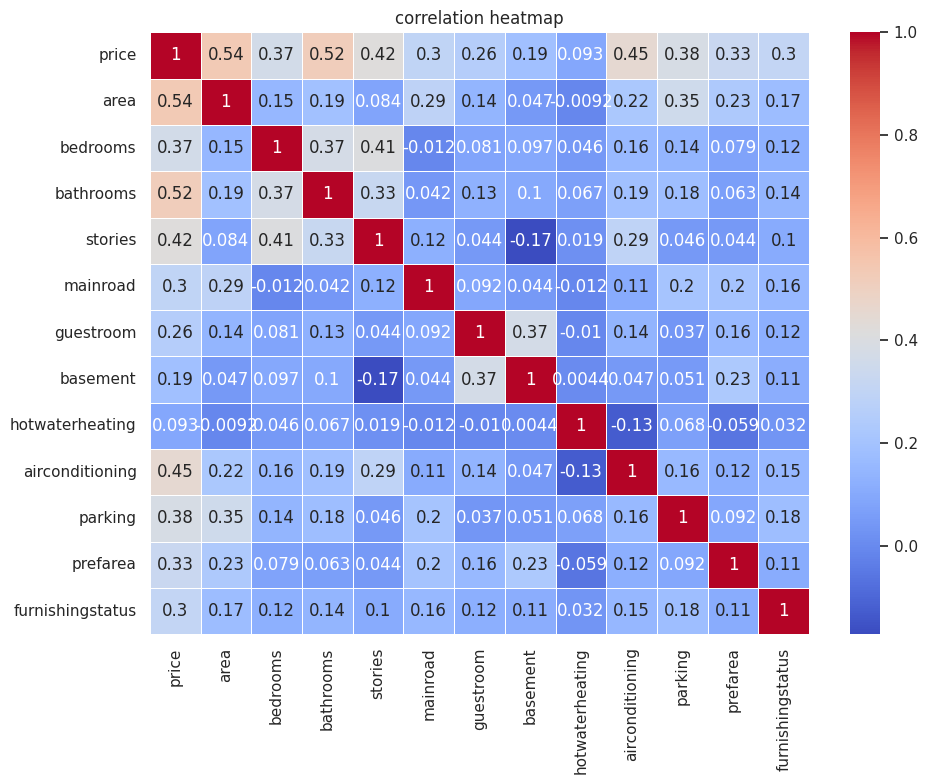

In [16]:
#ploting pearson correlation matrix heatmap
data_corr = data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(data_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("correlation heatmap")
plt.tight_layout()
plt.show()

### *`Correlation Heatmap`*

* `Area`, `bathrooms`, `bedrooms`, and `stories` have the strongest positive correlation with price.

* Features like `hotwaterheating` show a slight negative correlation, suggesting they don’t contribute much to pricing.

* `Furnishing status` has a low to moderate correlation (~0.30), but it still holds some influence.

* This heatmap helps us understand which features might be more useful in predictive modeling.

In [17]:
#print column name which has vlaue more than 0.3 in correlation matrix excluding price 
target_corr = data_corr['price'].drop('price')
selected = target_corr[abs(target_corr) > 0.30]
print("selected columns from correlation heatmap:")
print(selected.sort_values(ascending=False))

selected columns from correlation heatmap:
area                0.535997
bathrooms           0.517545
airconditioning     0.452954
stories             0.420712
parking             0.384394
bedrooms            0.366494
prefarea            0.329777
furnishingstatus    0.304721
Name: price, dtype: float64


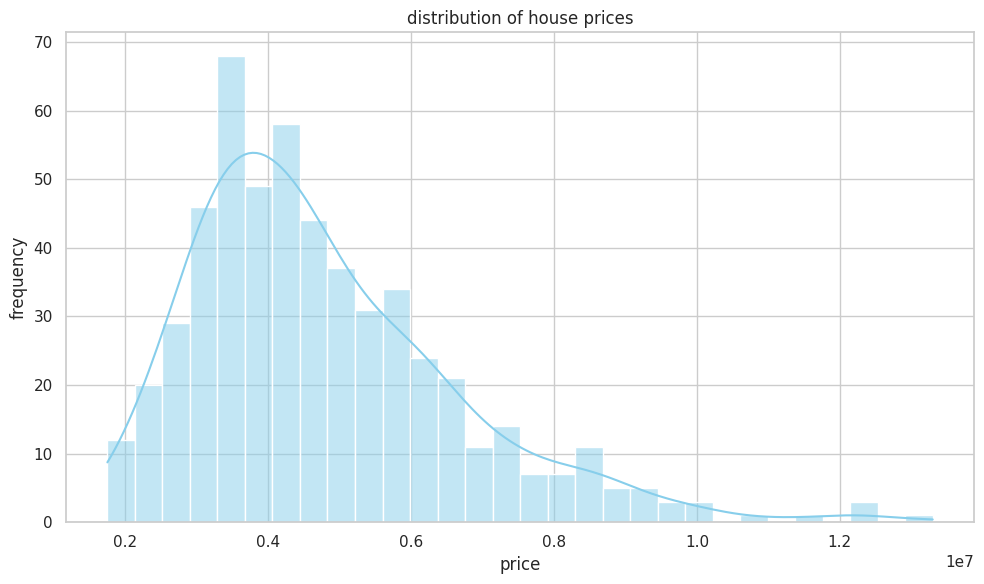

In [18]:
# Ploting Distribution of House-Price
plt.figure(figsize=(10, 6))
sns.histplot(data["price"], kde=True, bins=30, color='skyblue')
plt.title("distribution of house prices")
plt.xlabel("price")
plt.ylabel("frequency")
plt.tight_layout()
plt.show()

### *`House Price Distribution`*

* The histogram shows that most houses are priced between ₹30 lakhs to ₹60 lakhs. 

* The distribution is right-skewed, meaning there are a few very high-priced houses pushing the tail. 

* This implies that while affordable housing dominates, there are luxury properties too.

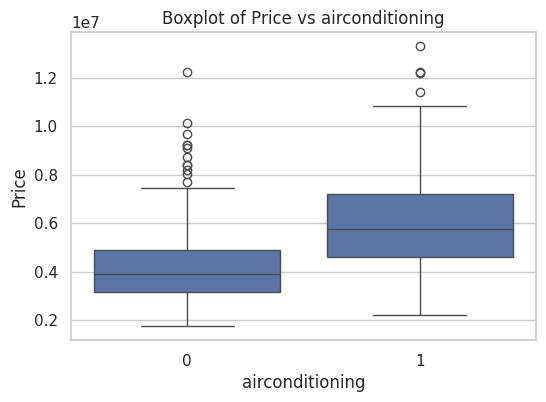

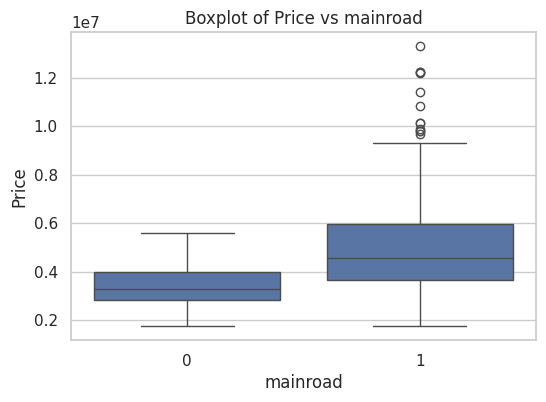

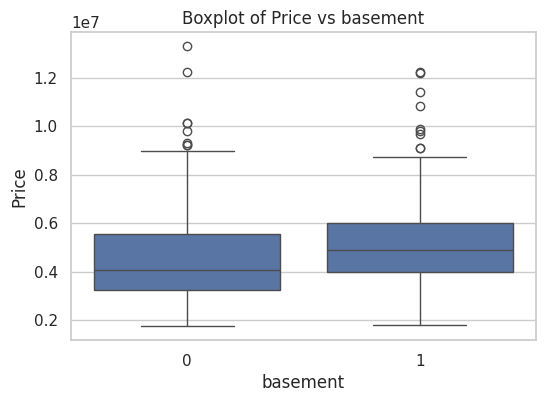

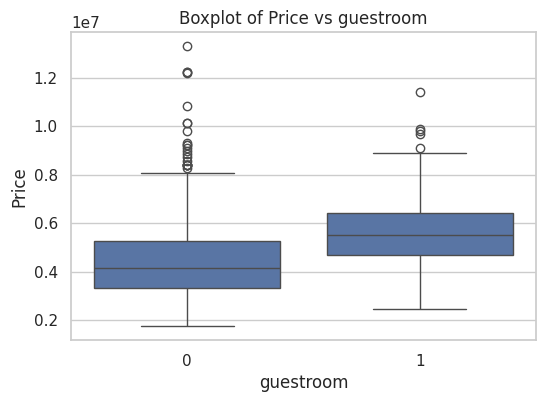

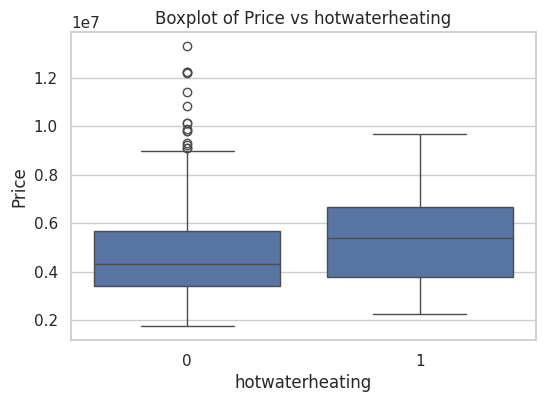

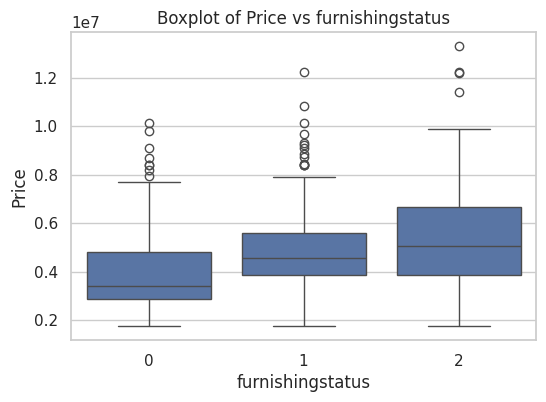

In [19]:
#boxplot for mostly columns
categorical_columns = ['airconditioning', 'mainroad', 'basement', 'guestroom', 'hotwaterheating', 'furnishingstatus']
for columns in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=columns, y='price', data=data)
    plt.title(f'Boxplot of Price vs {columns}')
    plt.xlabel(columns)
    plt.ylabel('Price')
    plt.show()

*The above boxplots show that houses with `air-conditioning`, access to the `main road`, and a `guestroom` tend to have higher median prices than those without. The presence of a `basement` shows only a slight price difference. `Hot water` heating appears to increase median price marginally, while the `furnishing-status` clearly impacts price — `fully-furnished houses` (label 2) have higher price ranges compared to `semi- or unfurnished` ones. so, these features contribute differently to house pricing, but `air-conditioning` and `furnishing-status` showing stronger influence.*


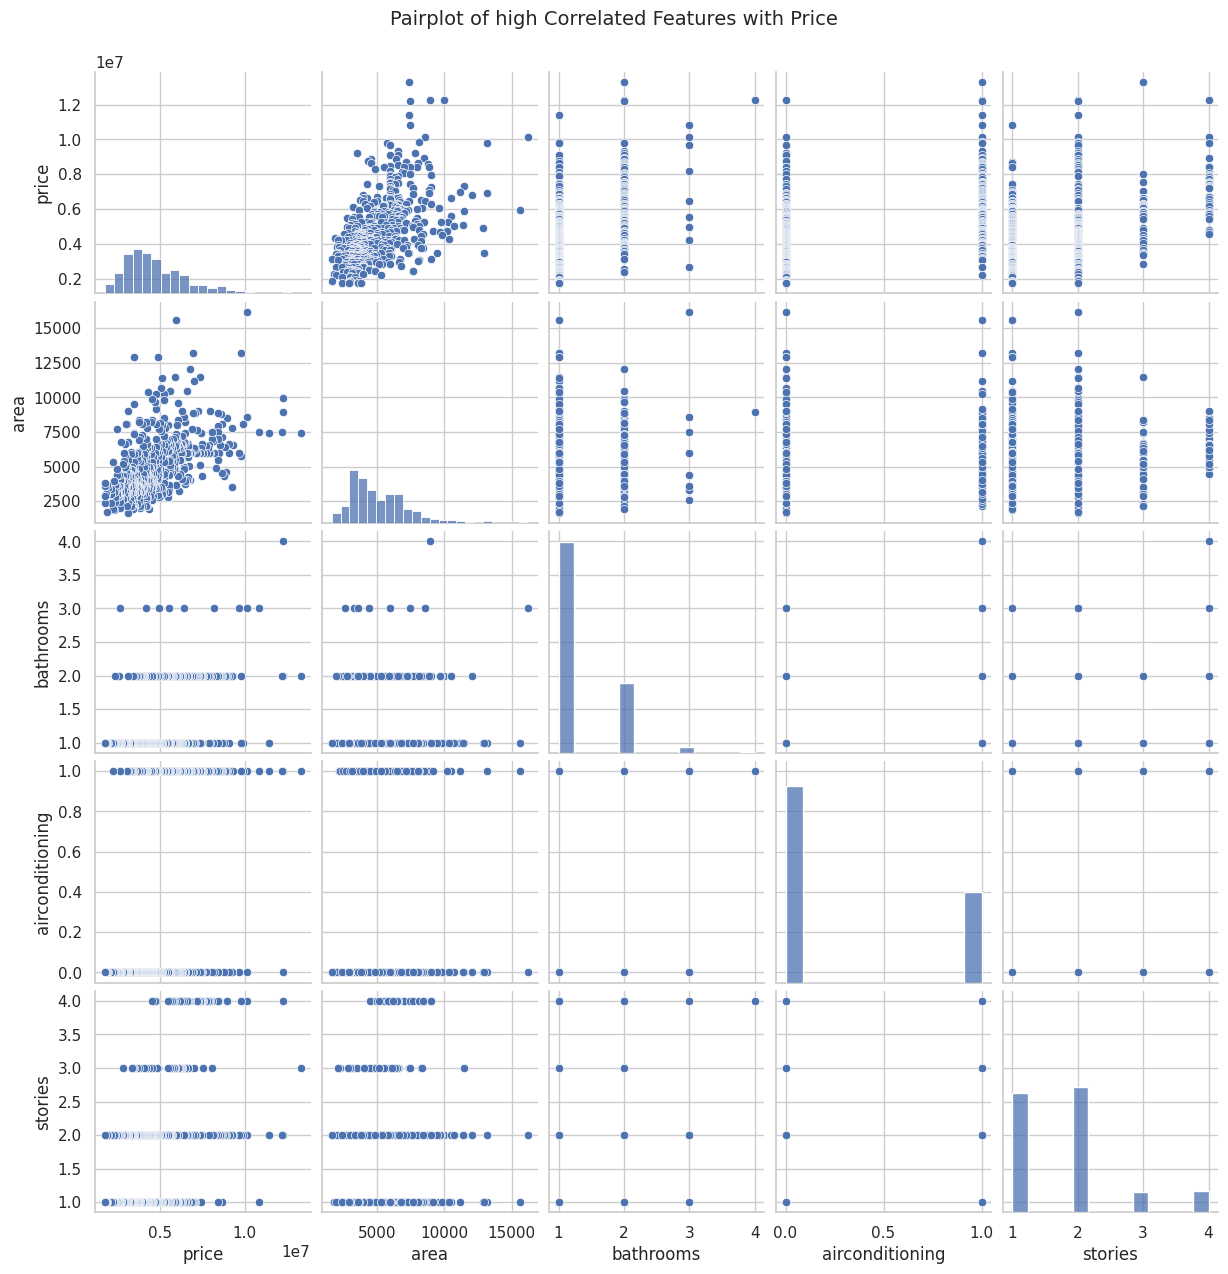

In [20]:
#pairplot graph of high correlation with price
selected_features = ['price', 'area', 'bathrooms', 'airconditioning', 'stories']
sns.pairplot(data[selected_features])
plt.suptitle('Pairplot of high Correlated Features with Price', y=1.02, fontsize=14)
plt.show()

*The above pairplot reveals that house price is positively correlated with `area`, indicating that larger properties tend to cost more. `Bathrooms` and number of `stories` also show a moderate upward trend with `price`. `Air-conditioning` appears as a binary factor but aligns more with `higher price` clusters. So the conclusion is the `area` shows the strongest `linear relationship` with price among the selected features.*


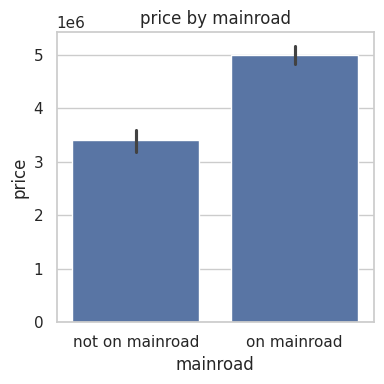

In [21]:
#bar plot of mainroad vs average price
plt.figure(figsize=(4, 4))
sns.barplot(x='mainroad', y='price', data=data)
plt.xticks([0, 1], ['not on mainroad', 'on mainroad'])
plt.title("price by mainroad")
plt.ylabel("price")
plt.xlabel("mainroad")
plt.tight_layout()
plt.show()

*The above bar-plot shows that houses located on the `main road` have significantly higher average `prices` than those that are not. This suggests that main road access positively influences property value, likely due to better connectivity and convenience.*


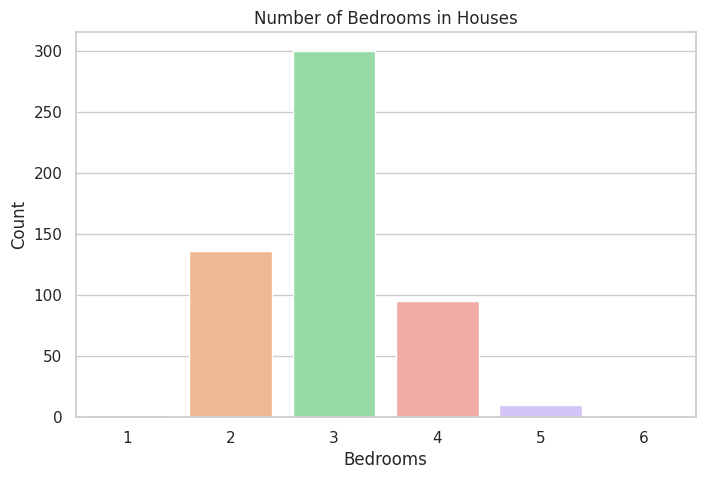

In [22]:
plt.figure(figsize=(8, 5))
sns.countplot(x='bedrooms', data=data, hue='bedrooms', palette='pastel', legend=False)
plt.title('Number of Bedrooms in Houses')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

*The bar chart indicates that most houses have 3 bedrooms, followed by those with 2 and 4 bedrooms. Homes with 5 or more bedrooms are rare. This suggests that 3-bedroom houses are the most common and possibly the most preferred configuration in the dataset.*


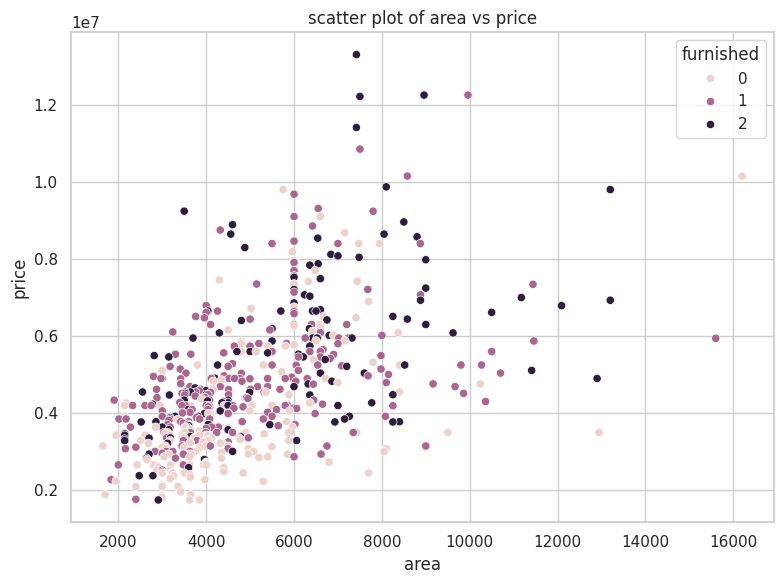

In [23]:
#scatter plot: area vs price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='area', y='price', hue='furnishingstatus')
plt.title("scatter plot of area vs price")
plt.xlabel("area")
plt.ylabel("price")
plt.legend(title="furnished")
plt.tight_layout()
plt.show()

*The above scatter-plot shows a positive relationship between `area` and `price` — as `area increases, price generally rises`. Additionally, `fully-furnished homes` (category 2) tend to `cluster at higher prices`, It shows that furnishing level contributes to property value alongside area.*


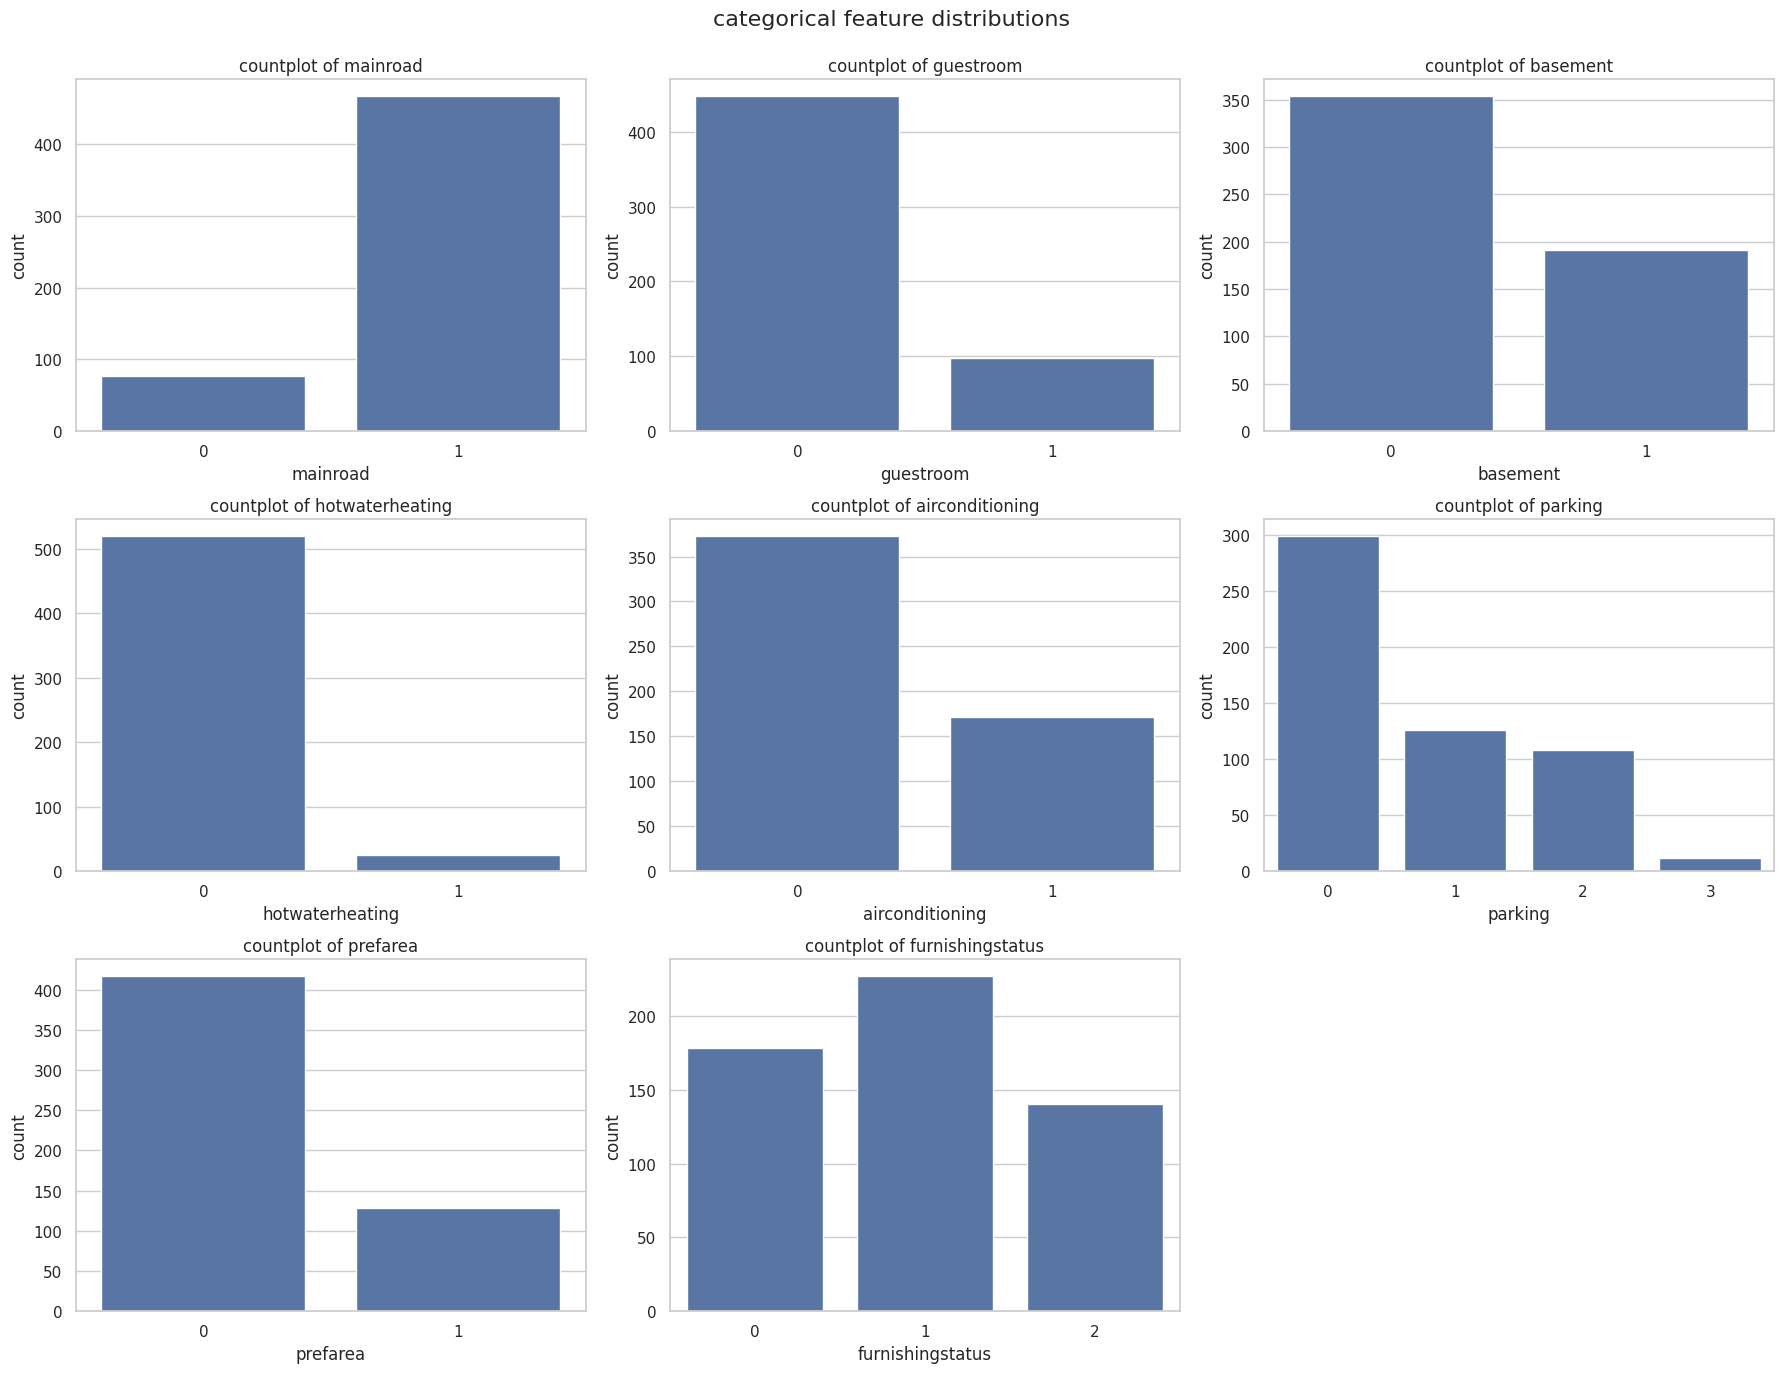

In [24]:
#countplots for categorical columns
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

plt.figure(figsize=(18, 14))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=data)
    plt.title(f"countplot of {col}")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.tight_layout()

plt.suptitle("categorical feature distributions", fontsize=16)
plt.subplots_adjust(top=0.93)
plt.show()

*The above distribution plots show that most houses are located on the `main road`, have no `guest-room` or `basement`, and lack `hot water heating`. A significant number have no `air-conditioning` or `parking`. And majority of them are `semi-furnished`, with `unfurnished` and `fully-furnished` homes being less common.*
